# Introduction à la Science des données


## Travail pratique 02 – Outils pour le calcul scientifique II 


### Table des matières

[Analyse des données socio-économiques](#Analyse-des-données-socio-économiques)

[- Bases](#Bases)

[- Histogrammes](#Histogrammes)

[- Manipulations des données](#Manipulations-des-données)

[- Manipulations et graphiques](#Manipulations-et-graphiques)


**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing

**Contact**: prenom.nom@heig-vd.ch ou de préférence via Teams pout l'assistant

**Rendu**:
- Date: 07.11.2022, 23h55

- Modalité: Travail individuel. Une fois complété, rendez directement le notebook nommé correctement comme suit "**TP2_ISD_SA2022_Nom_Prenom.ipynb**" en remplaçant Nom et Prenom par les votres, y compris ci-dessous, puis uploader votre fichier sur Cyberlearn.

- Les questions sont généralement indiquées en **gras** ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 
- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.

- Note: Ce TP est noté sur 6, pour un poids de 5%

**Étudiant**: [redacted]

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Se familiariser avec la bibliothèque Pandas de gestion et traitement des dataframes.
- Mise en pratique de l'analyse et la caractérisation simple des attributs d’une base de données.



<div class="alert alert-block alert-info">
<b>Aide - Différentes Cheatsheets recommandées pour accompagner le TP.  </b>
</div>

N'oubliez pas que vous pouvez retourner vers le TP1 si vous avez des questions sur Python, Numpy, Pandas ou Matplotlib. 

- [Data wrangling with Pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib cheatscheets](https://matplotlib.org/cheatsheets/)



<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>


### 1.	Analyse des données socio-économiques

La fondation gapminder fondée par Hans Rosling et famille, fournit une base de données sur les pays, des outils d’analyse et des études d’analyse socio-économique très intéressantes. Les petits sets de données que nous allons utiliser peuvent sembler insignifiants mais une analyse objective et factuelle des données, comme le promeut la [fondation Gapminder](https://www.projectrosling.ch/fr/concept/), peut rapidement changer votre perception du monde !

Nous allons utiliser une petite base de données contenant la population, l’espérance de vie et le PIB par habitant pour différents pays du monde de 1952 à 2007, pour faire quelques analyses.

**N'hésitez pas à ouvrir votre TP1 pour avoir les quelques bases à portée de vue pour vous aider dans ce labo et les suivants !**


- Dans l'environnement Anaconda utilisé par Jupyter (l'environnement que vous avez inscrit comme kernel), commencez par importer le module gapminder avec pip: *pip install gapminder*. Une fois installé ce module, vous aurez accès à un dataframe appelé gapminder. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd
from gapminder import gapminder

# Pour plus de clareté et pour la tradition, on appelle notre DataFrame "df" 
df = gapminder

___
**1.1) Utilisez les méthodes head(), describe() et info() pour vous familiariser avec le DataFrame.**

In [2]:
# Utilisez la méthode head()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Utilisez la méthode describe()
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [4]:
# Utilisez la méthode info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


**1.2) Décrivez brièvement le contenu du dataset. Quelles sont les données présentes ? Que signifient-elles ?**

(2 points)

*Réponse:*

> Le pays, le continent du pays, l'année de collecte des données, l'espérance de vie à la naissance pour l'année,
> la population totale du pays pour l'année, et le PIB par tête à la valeur du dollar américain pour l'année

**1.3) Décrivez le contenu des résultats renvoyés par les trois méthodes ci-dessus:**

(3 points)

*Description head():*

> Retourne les `n` premières lignes du tableau de données. Par défaut, `n = 5`.

*Description describe():*

> Permet de générer quelques statistiques descriptives brutes sur les données du tableau qui peuvent être interprétées.
>
> Les statistiques descriptives comprennent celles qui résument la tendance centrale, la dispersion et la forme d'un échantillon.
> la tendance centrale, la dispersion et la forme distribution d'un ensemble de données, à l'exclusion des valeurs "NaN".

*Description info():*

> Imprime un résumé concis d'un DataFrame.
>
> Cette méthode imprime des informations du tableau, notamment le type d'index et les colonnes,
> les valeurs non nulles et l'utilisation de la mémoire.

<div class="alert alert-block alert-info">
<b>Corrections: </b> Points obtenus: /5
</div>

Remarques: 

___
### Histogrammes

**2.1) Utilisez la commande *pandas.DataFrame.hist(df)* ci-dessous pour vous faire une idée plus précise des valeurs dans la base de données.** 

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

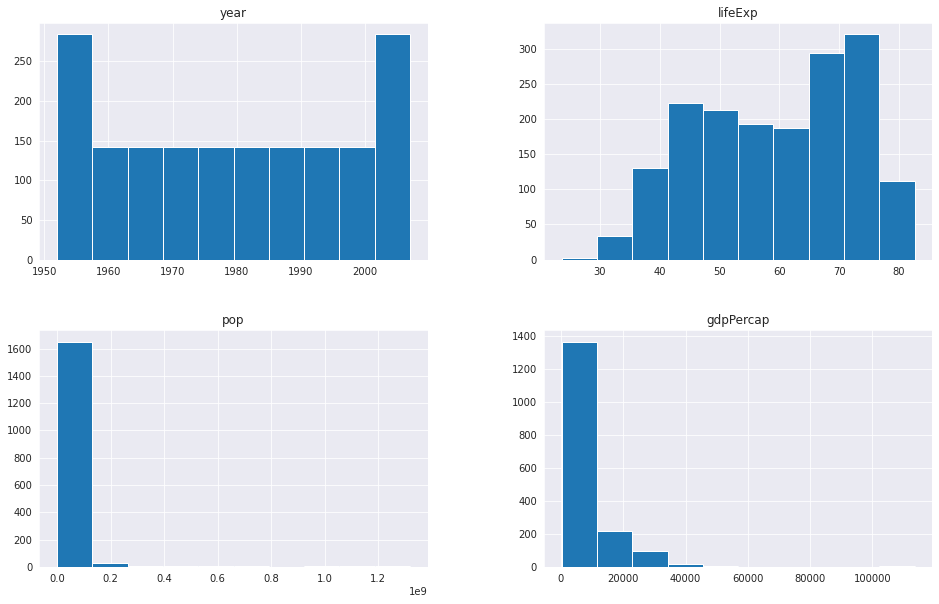

In [5]:
# Observez bien la notation utilisée et comment s'utilise la fonction "pandas.DataFrame.hist(df)"
# On ajoute la taille de figure en paramètres pour plus de clareté.

df.hist(figsize=(16, 10))

**2.2) Décrivez rapidement les quatre histogrammes ci-dessus. Que remarquez-vous avec l'histogramme représentant la variable "year" ?** 

(3 points)

*Réponse:*

> `year` représente la quantité de lignes du tableau qui ont l'année représentée en abscisse. On note que les données aux extrémités sont étrangement
> représentées, car les sous-ensembles de données représentés par la première et la dernière colonne contient une année de plus que les autres.
>
> `lifeExp` représente la quantité de lignes du tableau qui ont l'espérance de vie représentée en abscisse.
>
> `pop` représente la quantité de lignes du tableau qui ont la population représentée en abscisse. On note que le dataset fournit beaucoup
> de pays de moins de 100'000'000 habitants, ce qui est mal représenté ici, car la majorité des pays n'ont pas forcément autant d'habitants
>
> `gdpPerCap` représente la quantité de ligne du tableau qui ont le PIB par tête représenté dans en abscisse.

**2.3) Exécutez le code ci-dessous puis répondez aux questions suivantes:**

(2 points)

- Que représente le paramètre "bins" ? Aidez-vous de [la doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) si nécessaire.

*Réponse:*

> Représente le nombre de "colonnes" à afficher dans l'histogramme, cela permet d'ajuster les fourchettes de données représentées en ordonnée.

- Quelle conclusion pouvez vous tirer concernant la représentation de la variable "year" dans le dataset ?

*Réponse:*

> On note que les données aux extrémités sont étrangement représentées.
> Comme chaque pays continent 12 années de statistiques, l'histogramme représente ces 12 années sur 10 colonnes.
>
> Il y a 55 ans de différence entre la première et la dernière, donc l'histogramme sépare les colonnes par tranche de 5.5 années.
>
> Pour la première colonne, il y a donc deux années du dataset qui sont compatibilisées (1952 et 1955). Comme l'écart entre les
> années est de 3 ans dans les données et que l'histogramme représente une colonne par tranche de 5.5 années, années suivantes tombent
> dans une tranche où seulement une année sera représentée.
 >
 > Le décalage est rattrapé à la fin où 2 années sont de nouveau compatibilisées dans la même colonne.


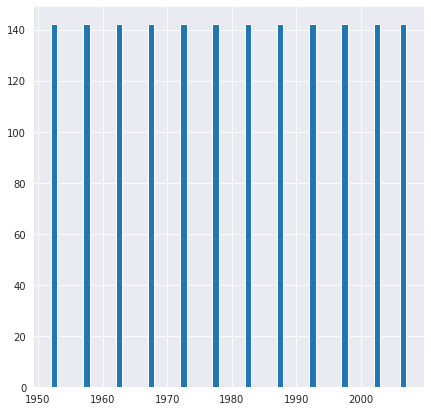

In [6]:
# Code question 2.3
df["year"].hist(figsize=(7, 7), bins=55);

<div class="alert alert-block alert-info">
<b>Corrections: </b> Points obtenus: /5
</div>

Remarques: 

___

### Manipulations des données

**3.1) Trouvez combien d’observations il y a par pays et par année (c.a.d., combien de données par pays et par année) et vérifiez s’il y a des données manquantes.** 

(3 points)

Pour vérifier s'il y a des données manquantes, vérifiez simplement qu'aucun pays/année n'a moins de données que les autres. Ecrivez vos conclusions dans la cellule ci-après. 

Pour cela, utilisez les fonctions: *groupby()* avec comme paramètres "year" et "country" puis *size()* pour avoir la taille. Observez en premier à quoi ressemble le résultat de ces deux fonctions puis enchaînez avec *describe()* afin d'en tirer des conclusions. 

Regardez les exemples de [la doc pour la fonction groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) afin de voir comment **chaîner les méthodes**.

In [7]:
# Écrivez votre code ici. Note: une seule ligne suffit. 
df.groupby(['year', 'country']).size().describe()


count    1704.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

**3.2) Combien de mesures ont été faites par année ? (pas besoin d'utiliser *describe()*)**

(2 points)

In [8]:
# Écrivez votre code ici. Note: une seule ligne suffit. 
df.groupby('year').size()


year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

**3.3) Que pouvez-vous conclure concernant les donneés manquantes:**

(1 point)

*Réponse:*

> Il ne manque pas de données, chaque pays contient 12 mesures aux mêmes années.


___
**3.4) Listez les valeurs uniques présentes dans les colonnes ‘continent’, ‘country’, et ‘year’. Utilisez la méthode *unique()*.** 

(3 points)

Aide: vous pouvez utiliser *df['Nom Colonne']* ou *df.loc[:,'Nom colonne']* pour retourner directement le contenu d'une colonne. 

In [9]:
# Écrivez votre code ici. Note: une seule ligne suffit par colonne. Affichez vos résultats dans des cellules différentes.  

# Continent
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [10]:
# Country
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [11]:
# Year
df['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

<div class="alert alert-block alert-info">
<b>Corrections: </b> Points obtenus: /9
</div>

Remarques: 

___

### Manipulations et graphiques

**4.1) Calculez la moyenne de l’espérance de vie de tous les pays en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.**

(5 points)

Pour sélectionner les données des bonnes années, regardez les [exemples de la doc ("Getting values")](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) pour vous aider à comprendre comment faire à l'aide de conditions. 


Une fois que vous avez un nouveau DataFrame avec uniquement les données de 1952 et 2007, gardez uniquement les colonnes d'intérêt (year et lifeExp), groupez les données par année et calculez la moyenne de l'espérence de vie. Une fois ceci fait, utilisez la fonction ```df.plot.bar()``` 

Aide: vous pouvez utiliser plusieur .loc[] d'affilée, une fois pour choisir les années, et une fois pour choisir les colonnes d'intérêt. **Regardez l'exemple ci-dessous pour vous aider**.

Notes: toutes ces opérations peuvent être effectuées à la chaîne, en une seule ligne. Si vous souhaitez faire cela petit à petit, n'oubliez pas d'enregistrer vos résultats intermédiaires dans une variable: ``` tmp_df = df.loc["exemple"]```. **Vous pouvez créer des cellules supplémentaires si vous l'estimez nécessaire.**




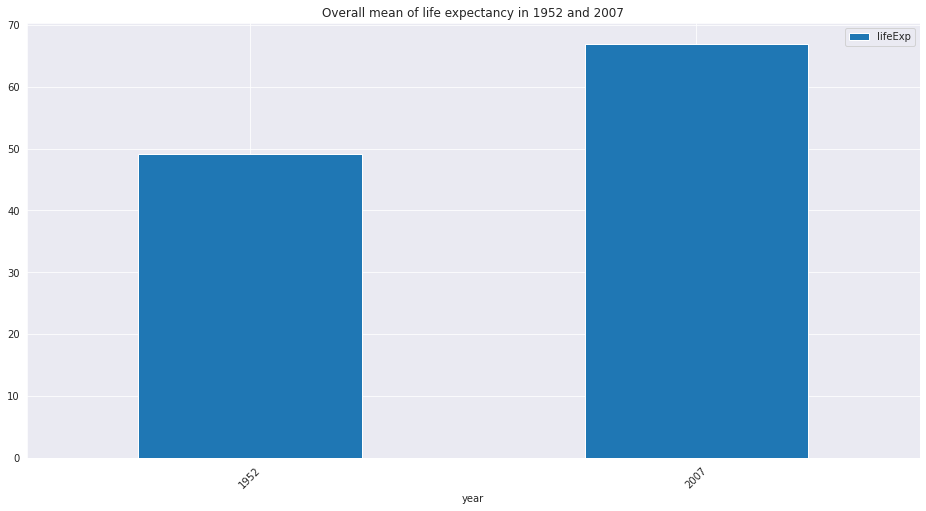

In [12]:
# Écrivez votre code ici

plt_lexp = df[df['year'].isin([1952, 2007])][['year', 'lifeExp']].groupby('year').mean('lifeExp').plot.bar(rot=45, figsize=(16, 8))
plt_lexp.set_title('Overall mean of life expectancy in 1952 and 2007');

Ci-dessous, un petit **exemple** qui utilise le "method chaining". Cette notation, qui profite du fait que chaque methode Pandas retourne un DataFrame auquel on peut appliquer une nouvelle méthode, augmente grandement la lisibiltié du code. Vous trouvez une section avec un exemple sur [La cheat sheet "Data wrangling with Pandas"](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). 

>Most pandas methods return a DataFrame so that another pandas method can be applied to the result. This improves readability of code.


En plus de chaîner les méthodes, le graphique est rendu beaucoup plus lisible en y ajoutant des axes bien nommés, un titre et des labels inclinés. Libre à vous de vous inspirer de cet exemple pour l'exercice 5. 

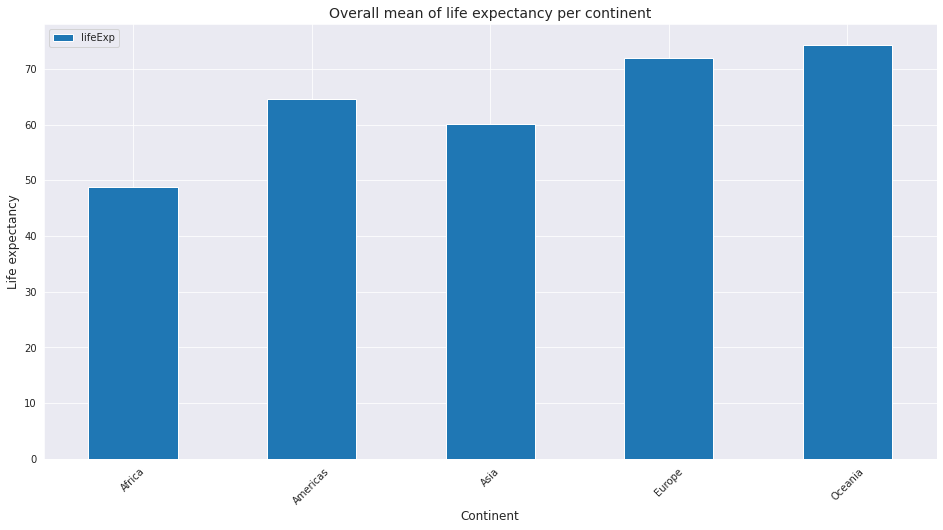

In [13]:
# Exemple

ax = (df
      .loc[:, ['continent', 'lifeExp']]
      .groupby('continent')
      .mean('lifeExp')
      .plot.bar(rot=45, figsize=(16, 8))
      )
ax.set_title('Overall mean of life expectancy per continent', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Life expectancy', fontsize=12);


___


**4.2) Calculez la moyenne de l’espérance de vie des pays par continent en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.**

(5 points)

Comme pour l'exercice précédent, vous devez transformer vos données avant de les afficher. Ici vous devez grouper sur deux niveaux: par année puis par continent. Le graphique final aura un aspect similaire à celui ci-dessus, avec deux barres par continent: une pour 1952 et une pour 2007.

Pour avoir le format de données attendu pour générer l'histogramme ( Continent | 1952 | 2007 ) voous devrez utiliser la fonction [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html). Lisez rapidement la documentation pour en comprendre le sens puis transformez vos données ci-dessous. On vous conseille de lire [cet article de la documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html) pour bien comprendre les différentes manipulations appliquées aux données. Des exemples avec images permettent une bonne compréhension, spécialement pour la fonction *unstack()* qui peut être un peu abstraite au début. 


**Note:** dans la cellule à compléter ci-dessous, le résultat n'est pas affecté à une variable mais uniquement affiché en sortie pour tester le code. Pour affecter le résultat remplissez la cellule d'après comme indiqué, avec le résultat de vos essais. 



In [14]:
# Testez votre code ici (qui ne fait qu'afficher le dataFrame transformé). Profitez de "jouer" avec les différentes fonctions.

df[df['year'].isin([1952, 2007])][['year', 'continent', 'lifeExp']].groupby(['continent', 'year']).mean('lifeExp').unstack()

lifeExp           
year            1952       2007
continent                      
Africa     39.135500  54.806038
Americas   53.279840  73.608120
Asia       46.314394  70.728485
Europe     64.408500  77.648600
Oceania    69.255000  80.719500

In [15]:
# Ajoutez votre code ici pour créer le dataFrame df_life_exp. Sans modification il sera égal à df

df_life_exp = df[df['year'].isin([1952, 2007])][['year', 'continent', 'lifeExp']].groupby(['continent', 'year']).mean('lifeExp').unstack()
df_life_exp

lifeExp           
year            1952       2007
continent                      
Africa     39.135500  54.806038
Americas   53.279840  73.608120
Asia       46.314394  70.728485
Europe     64.408500  77.648600
Oceania    69.255000  80.719500

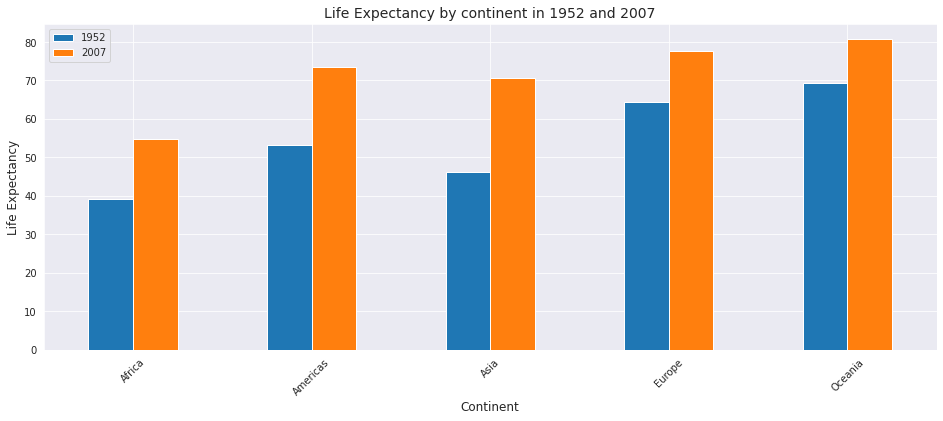

In [16]:
# Exécutez cette cellule pour afficher le graphique une fois df_life_exp formaté correctement.

# Barplot des deux années, par continent
ax = (df_life_exp
      .plot.bar(rot=45, figsize=(16, 6))
      )
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Life Expectancy', fontsize=12)
ax.set_title('Life Expectancy by continent in 1952 and 2007', fontsize=14)
# Rename legend to remove the None and the `LifeExp`.
ax.legend(labels=['1952', '2007'])


**4.3) Question** 

Quel pays affiche la plus grande progression de l'espérance de vie ?

(1 point)

Pour en être sûr, regardez la différence entre les moyennes des deux années en exécutant le code ci-dessous. Jettez un oeil à la fonction [pandas.diff()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html). Donnez votre réponse en plus d'une courte explication de la fonction *diff()*. 

*Réponse:*

> Oman a augmenté son espérance de vie de 38 années entre 1952 et 2007.
>
> En termes de continents, c'est l'Asie qui a eu la plus grande progression.
>
> `diff()` permet d'avoir la première différence discrète de l'élément.
> Calcule la différence d'un élément du tableau par rapport à un autre élément du tableau (par défaut, l'élément de la ligne précédente).
> Dans notre cas, on fait la différence avec la colonne précédente, car on utilise `axis=1`

In [17]:
# On peut voir la progression en faisant la différence entre les deux colonnes (1952 et 2007).

df[df['year'].isin(df['year'].agg(['min', 'max']))][['year', 'country', 'lifeExp']].groupby(['country', 'year']).mean().unstack().diff(axis=1).sort_values(('lifeExp', 2007), ascending=False)

lifeExp        
year            1952    2007
country                     
Oman             NaN  38.062
Vietnam          NaN  33.837
Indonesia        NaN  33.182
Saudi Arabia     NaN  32.902
Libya            NaN  31.229
...              ...     ...
Botswana         NaN   3.106
Lesotho          NaN   0.454
Zambia           NaN   0.346
Swaziland        NaN  -1.794
Zimbabwe         NaN  -4.964

[142 rows x 2 columns]

<div class="alert alert-block alert-info">
<b>Corrections 4.1 - 4.3: </b> Points obtenus: /11
</div>

Remarques: 

___
**Afin de visualiser la population par continent au fil du temps, nous créons le graphique ci-dessous.**

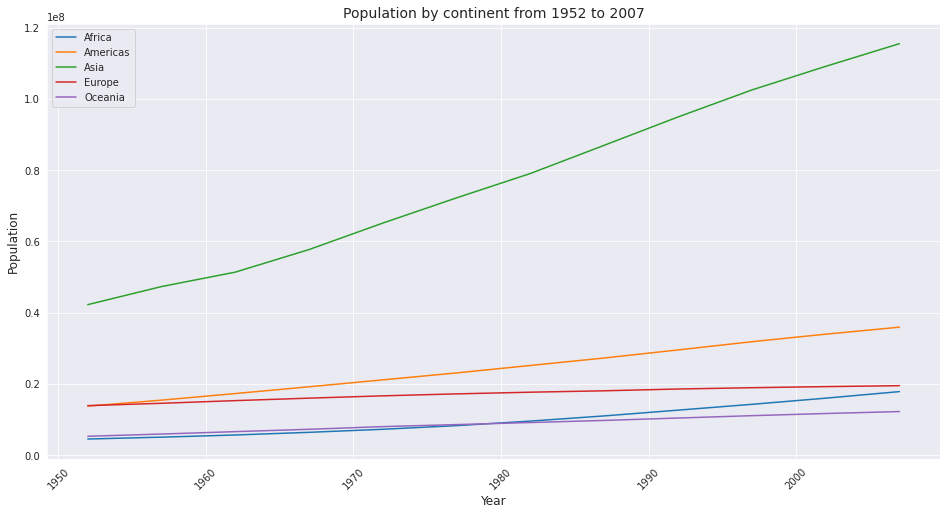

In [18]:
# Evolution of the population by continent from 1952 to 2007.
ax = (df
      .loc[:, ['year', 'continent', 'pop']]
      .groupby(['year', 'continent'])
      .mean('pop')
      .unstack('continent')
      .plot(rot=45, figsize=(16, 8))
      )
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Population by continent from 1952 to 2007', fontsize=14)
ax.legend(sorted(df['continent'].unique()))

**4.4) Que pouvez vous conclure à partir de ce graphique ?**

(1 points)

*Réponse:*

> La population en Asie augmente plus rapidement que les autres continents.
> La population en Europe est pratiquement constante.
>
> À noter que le graphique présenté ici considère la moyenne de la population de tous les pays d'un continent, ce qui ne
> correspond pas à la légende. Il serait plus indicatif d'utiliser la somme de la population de tous les pays d'un continent.

**4.5) Décrivez chaque étape de transformation des données.**

(5 points)

Par exemple:

*.loc[:, 'X'] : extrait la colonne "X" du DataFrame*

*.method : fait quelque chose*

...


*Réponse:*

> `.loc[:, ['year', 'continent', 'pop']]` permet d'extraire les colonnes 'year', 'continent' et 'pop' du tableau
>
> `.groupby(['year', 'continent'])` permet de regrouper par année et par continent
>
> `.mean('pop')` permet de prendre la moyenne de la population de tous les pays d'un continent
>
> `.unstack('continent')` permet de regrouper les continents par colonnes du tableau
>
> `.plot(rot=45, figsize=(16, 8))` permet d'afficher un graphique en lignes de l'évolution des données pour chaque année et chaque continent

**4.6) Affichez les données transformées qui sont passées à la fonction *plot()***. (recopiez simplement le bout de code concerné)

(2 points)

In [19]:
# Écrivez votre code ici:

df.loc[:, ['year', 'continent', 'pop']].groupby(['year', 'continent']).mean('pop').unstack('continent')

pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

In [20]:
#SOLUTION

(df
 .loc[:, ['year', 'continent', 'pop']]
 .groupby(['year', 'continent'])
 .mean('pop')
 .unstack('continent'))

pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

<div class="alert alert-block alert-info">
<b>Corrections 4.4 - 4.6: </b> Points obtenus: /8
</div>

Remarques: 

**4.7) Lisez attentivement le code du graphique suivant et ses commentaires. Ajoutez _une seule ligne_ pour définir comme taille de points du scatterplot, la population de chaque pays en million.**

(2 points)

Vous pouvez trouver le paramètre à ajouter dans [la doc](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html). 

Text(0.5, 0.98, 'Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

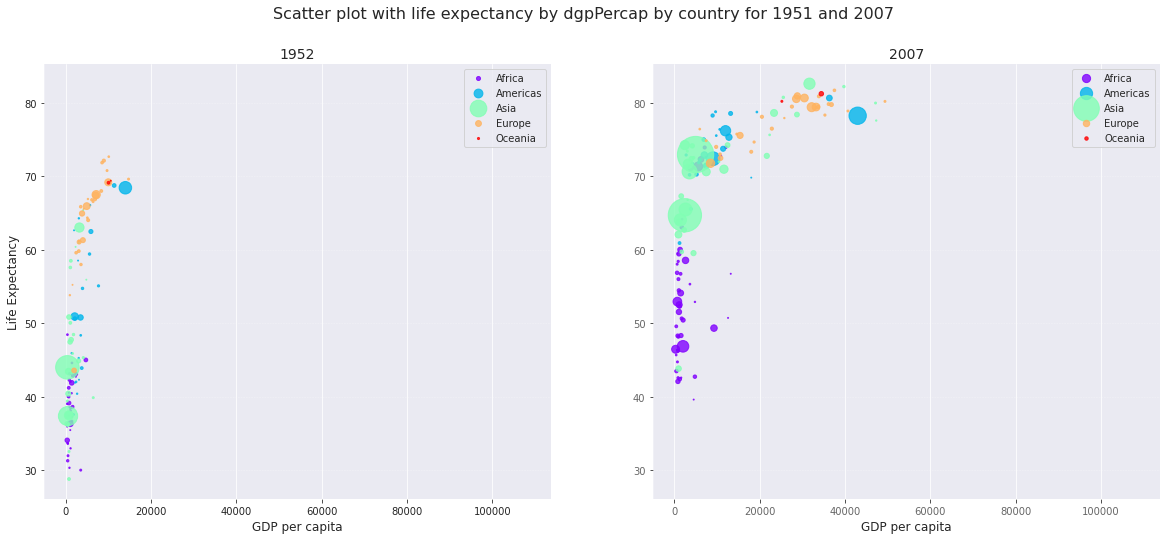

In [21]:
import matplotlib.cm as cm

NCOLORS = 5

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20, 8))

# Colormap for the continents.
cmap = list(cm.get_cmap("rainbow")(np.linspace(0, 1, NCOLORS)))

# Vous pouvez aussi définir les couleurs manuellement
# cmap = ["black","red","yellow","blue","green"]


for i, year in enumerate((1952, 2007)):
    data = df.query('year == @year')

    # Plot each continent as a different color in order to have a legend. 

    # Observez bien: 
    # - la fonction ennumerate et ce qu'elle retourne
    #     La fonction ennumerate() renvoie un index en plus des éléments d'une liste. 
    #     Ici elle retourne c, l'index, ainsi qu'un tuple avec le groupe et le dataframe correspondant.
    #     Pour accéder à la population de chaque pays on peut par exemple utiliser df_continent['pop']

    for c, (continent, df_continent) in enumerate(data.groupby('continent')):
        # Scatterplot
        df_continent.plot.scatter(ax=axs[i],
                                  x='gdpPercap',
                                  y='lifeExp',
                                  s=df_continent['pop'] // 1e6,
                                  color=[cmap[c]],
                                  label=continent,
                                  alpha=0.8)

    # Plot style

    axs[i].set_title(year, fontsize=14)
    axs[i].set_xlabel('GDP per capita', fontsize=12)
    axs[i].grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)

    # Remove border on the top and right.
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    # Set alpha on remaining borders.
    axs[i].spines['left'].set_alpha(0.4)
    axs[i].spines['bottom'].set_alpha(0.4)

    # Only show ticks on the left and bottom spines.
    axs[i].xaxis.set_ticks_position('bottom')
    axs[i].yaxis.set_ticks_position('left')
    # Style of ticks.
    plt.xticks(fontsize=10, alpha=0.7)
    plt.yticks(fontsize=10, alpha=0.7)

axs[0].set_ylabel('Life Expectancy', fontsize=12)
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007', fontsize=16)


**4.8) Analyse: Décrivez cette figure et répondez aux questions suivantes:**

(5 points)

- Quel est le principal message transmi ? 
- Quelles informations peut-on y trouver ? 
- Est-ce un bon graphique ? Que pourrait-on ajouter / supprimer pour le rendre plus riche en information ou plus pertinent ?


*Réponses:*

> 1) - Les pays avec le PIB par tête plus élevé ont une meilleure espérance de vie moyenne. (Correlation entre le PIB par tête et l'espérance de vie moyenne)
>    - Les pays plus développés avec une population moins élevée ont aussi une meilleure espérance de vie.
>    - La plupart des pays plus petits dans les continents mieux développés ont un meilleur PIB par tête
>
> 2) On y trouve les continents, chaque pays avec sa population représentée par la taille du point, l'espérance de vie du pays et son PIB par tête.
>
> 3) Il serait potentiellement plus informatif de représenter le PIB par tête (GDP per capita) sous forme d'une échelle logarithmique.


<div class="alert alert-block alert-info">
<b>Corrections 4.7 - 4.8: </b> Points obtenus: /7
</div>

Remarques: 